In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/My Drive/diabetic_data.csv")

In [4]:
#displaying first 10 rows of data
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96446 entries, 1 to 101765
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              96446 non-null  int64  
 1   patient_nbr               96446 non-null  int64  
 2   race                      96446 non-null  object 
 3   gender                    96446 non-null  int64  
 4   age                       96446 non-null  int64  
 5   admission_type_id         96446 non-null  int64  
 6   discharge_disposition_id  96446 non-null  int64  
 7   admission_source_id       96446 non-null  int64  
 8   time_in_hospital          96446 non-null  int64  
 9   num_lab_procedures        96446 non-null  int64  
 10  num_procedures            96446 non-null  int64  
 11  num_medications           96446 non-null  int64  
 12  number_outpatient         96446 non-null  int64  
 13  number_emergency          96446 non-null  int64  
 14  number_inp

In [5]:
#checking shape of the dataset
df.shape

(101766, 50)

In [6]:
#Checking data types of each variable
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [7]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


**Dealing with Missing Values**

In [8]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [9]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

Variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so I decided to drop these two variables

In [10]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


**Feature Engineering**

In [11]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [14]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

,count
numchange,
0,70142
1,24922
2,1271
3,106
4,5


In [15]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, I interpreted the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.



In [16]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

I also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested

In [17]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [18]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

,count
age,
8,24815
7,21521
6,16546
9,16223
5,9208
4,3538
10,2594
3,1471
2,466


In [19]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [20]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


No charts were generated by quickchart


In [21]:
df['readmitted'].value_counts()

,count
readmitted,
NO,50731
>30,34649
<30,11066


In [22]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

Categorization of diagnoses: The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. Therefore, I collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others.

In [23]:
# Creating additional columns for diagnosis
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [24]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [25]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [26]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [27]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0

    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

**Data Visualization**

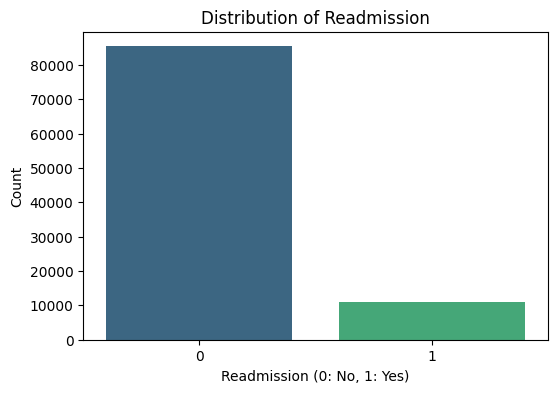

In [32]:
# graph showing distribution of readmission

plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=df, palette='viridis')
plt.title('Distribution of Readmission')
plt.xlabel('Readmission (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

Distribution of Readmission

Target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

Time in Hospital and Readmission

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

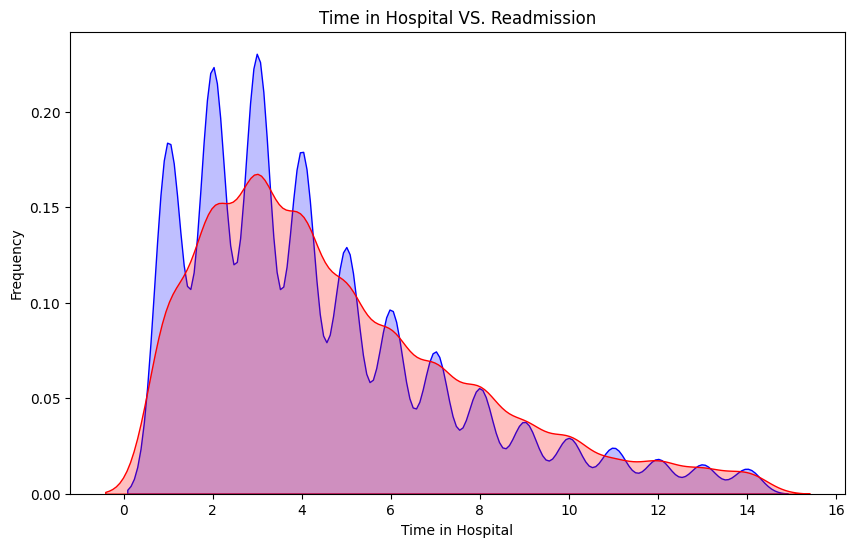

In [37]:
fig = plt.figure(figsize=(10,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

**Age and Readmission**

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

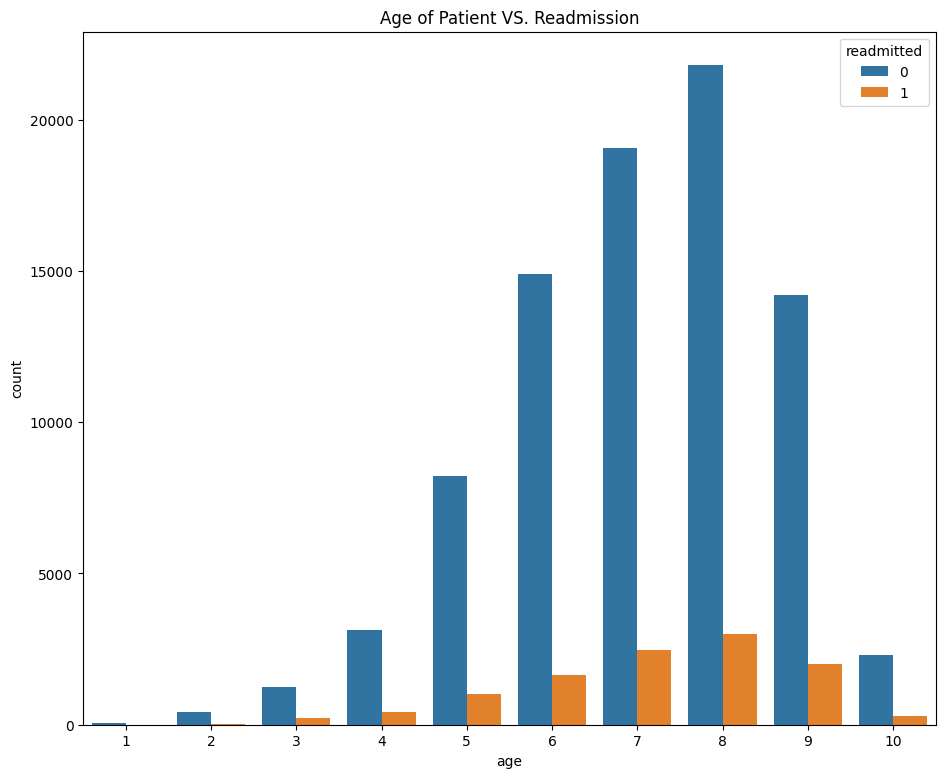

In [36]:
fig = plt.figure(figsize=(11,9))
sns.countplot(x= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

**Ethnicity of patient and Readmission**

<Axes: xlabel='race', ylabel='count'>

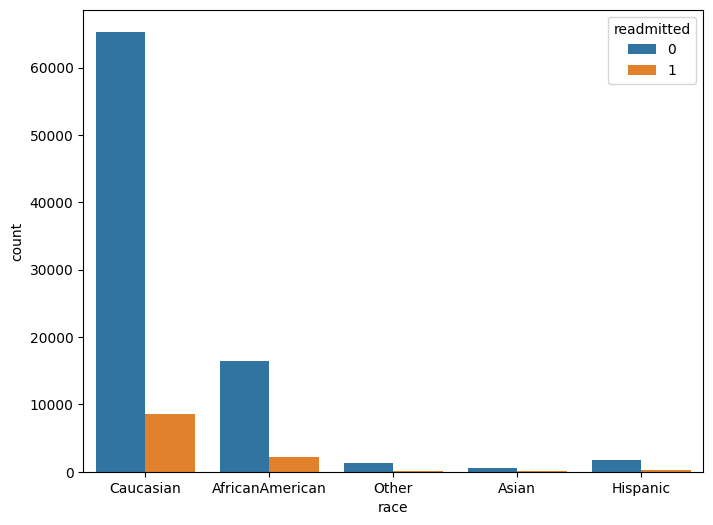

In [41]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x = df['race'], hue = df['readmitted'])

**Number of medication used and Readmission**

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

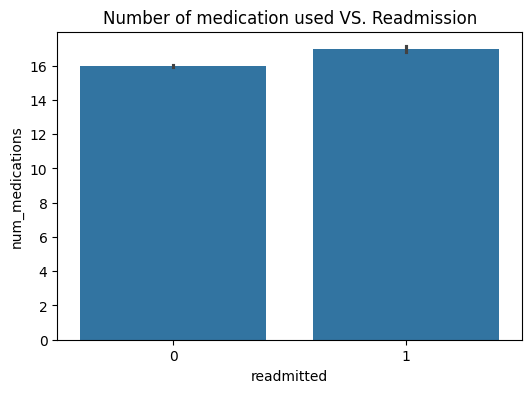

In [44]:
fig = plt.figure(figsize=(6,4))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

**Pre-Modeling Data Preprocessing**

This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, I do not want to lose that information by treating it as a simple categorical variable

In [47]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64
age
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: count, dtype: int64


In [49]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3'] # Removed the duplicate 'A1Cresult'

df[i] = df[i].astype('object')

In [50]:
df.dtypes

,0
encounter_id,object
patient_nbr,object
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


In [51]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

,count
nummed,
1,44589
0,22156
2,20901
3,7448
4,1290
5,57
6,5


In [52]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['service_utilization',
 'num_lab_procedures',
 'number_outpatient',
 'numchange',
 'number_inpatient',
 'number_emergency',
 'num_procedures',
 'time_in_hospital',
 'num_medications',
 'number_diagnoses']

In [53]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []
for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [54]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656
1,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
2,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
3,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614
4,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
5,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
6,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
7,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
8,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
9,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659


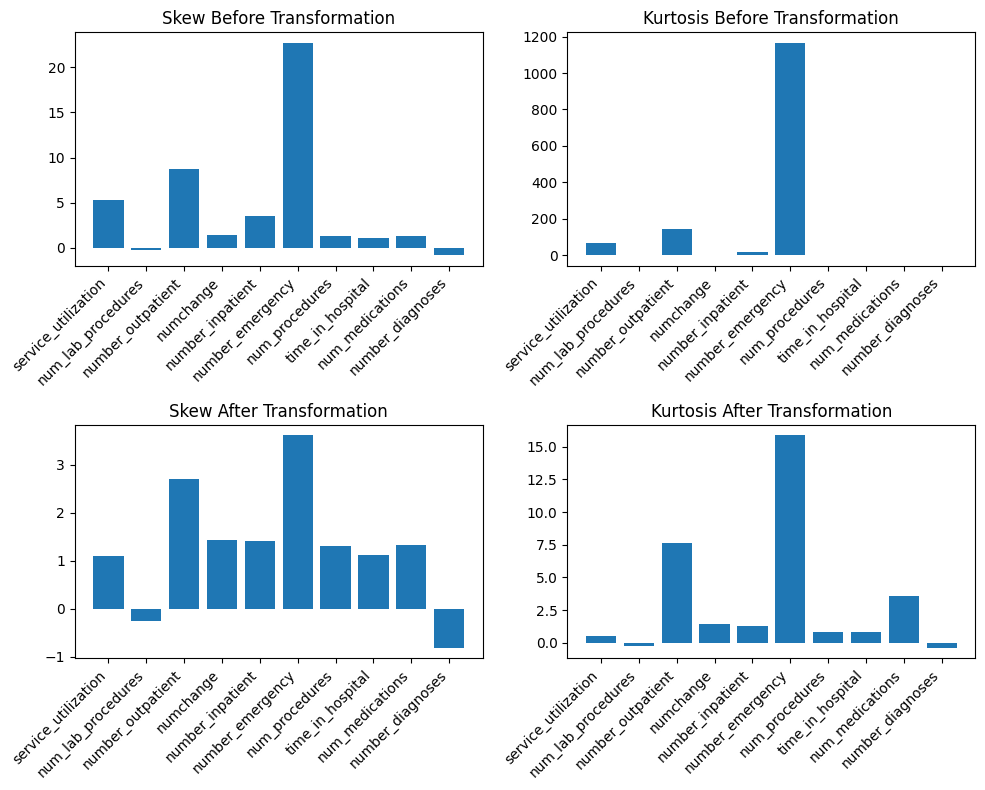

In [56]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot skew before
axes[0, 0].bar(statdataframe['numeric_column'], statdataframe['skew_before'])
axes[0, 0].set_title('Skew Before Transformation')
axes[0, 0].set_xticklabels(statdataframe['numeric_column'], rotation=45, ha='right')

# Plot kurtosis before
axes[0, 1].bar(statdataframe['numeric_column'], statdataframe['kurtosis_before'])
axes[0, 1].set_title('Kurtosis Before Transformation')
axes[0, 1].set_xticklabels(statdataframe['numeric_column'], rotation=45, ha='right')

# Plot skew after
axes[1, 0].bar(statdataframe['numeric_column'], statdataframe['skew_after'])
axes[1, 0].set_title('Skew After Transformation')
axes[1, 0].set_xticklabels(statdataframe['numeric_column'], rotation=45, ha='right')

# Plot kurtosis after
axes[1, 1].bar(statdataframe['numeric_column'], statdataframe['kurtosis_after'])
axes[1, 1].set_title('Kurtosis After Transformation')
axes[1, 1].set_xticklabels(statdataframe['numeric_column'], rotation=45, ha='right')


# Adjust layout
plt.tight_layout()
plt.show()


In [57]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [58]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [59]:
df.shape

(96446, 56)

In [60]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['number_outpatient_log1p',
 'number_emergency_log1p',
 'service_utilization_log1p',
 'number_inpatient_log1p',
 'num_lab_procedures',
 'numchange',
 'num_procedures',
 'time_in_hospital',
 'num_medications',
 'number_diagnoses']

In [62]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']

# Instead of directly converting to int64, fill NaN with -1 then convert to int64
df[i] = df[i].fillna(-1).astype('int64') # fill NaN with -1 which can be convert to int64

df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


In [63]:
dfcopy = df.copy(deep = True)

In [64]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [65]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [66]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [67]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [68]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


from matplotlib import pyplot as plt
_df_0['num_medications'].plot(kind='hist', bins=20, title='num_medications')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['time_in_hospital'].plot(kind='hist', bins=20, title='time_in_hospital')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num_medications|time_in_hospital'].plot(kind='hist', bins=20, title='num_medications|time_in_hospital')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='num_medications', y='time_in_hospital', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='time_in_hospital', y='num_medications|time_in_hospital', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_in_hospital']
  ys = series['num_medications']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('time_in_hospital', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_in_hospital')
_ = plt.ylabel('num_medications')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_in_hospital']
  ys = series['num_medications|time_in_hospital']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('time_in_hospital', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_in_hospital')
_ = plt.ylabel('num_medications|time_in_hospital')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time_in_hospital']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time_in_hospital'}, axis=1)
              .sort_values('time_in_hospital', ascending=True))
  xs = counted['time_in_hospital']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('time_in_hospital', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_in_hospital')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['num_medications'].plot(kind='line', figsize=(8, 4), title='num_medications')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['time_in_hospital'].plot(kind='line', figsize=(8, 4), title='time_in_hospital')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['num_medications|time_in_hospital'].plot(kind='line', figsize=(8, 4), title='num_medications|time_in_hospital')
plt.gca().spines[['top', 'right']].set_visible(False)

In [69]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [70]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 57)

In [71]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [72]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [74]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# Include numeric_only=True to calculate correlations only for numeric columns
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson', numeric_only=True)
table.style.background_gradient(cmap=my_cmap, axis = 0)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,service_utilization_log1p,number_outpatient_log1p,number_inpatient_log1p,number_emergency_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.331327,0.186547,0.465606,0.224597,0.072152,-0.004890,0.031373,0.006506,0.001714,0.014746,0.012643,0.020465,0.030489,0.002290,0.004280,0.004464,0.006717,-0.002693,0.004570,-0.005604,0.110359,-0.000305,0.001391,nan,nan,0.002204,0.111134,0.068988,0.053148,0.170019,0.012976,-0.025653,0.067455,-0.008040,0.830857,0.319449,0.860812,0.515463,0.479395,0.273178,0.943263,0.268011
num_lab_procedures,0.331327,1.000000,0.044017,0.258746,0.152297,0.263456,-0.044047,0.007205,-0.007233,-0.002519,-0.002873,0.004826,0.025201,0.006720,-0.000889,-0.011685,-0.005242,0.000383,-0.004196,0.004575,-0.000621,0.107462,-0.012837,-0.003918,nan,nan,-0.003849,0.075831,0.044684,0.030757,0.129632,0.027593,-0.022035,0.082202,0.017160,0.336987,0.157965,0.671236,0.698016,0.285921,0.165753,0.336665,0.179396
num_procedures,0.186547,0.044017,1.000000,0.396646,0.067989,-0.020062,-0.046817,0.003178,-0.003804,0.006460,0.005766,0.005609,0.007830,0.008437,-0.001083,0.014219,0.010137,0.000846,0.000135,-0.005442,0.000739,0.020315,-0.004721,-0.003352,nan,nan,-0.000954,0.005649,-0.006426,-0.000306,0.019420,-0.048069,-0.025749,-0.026510,-0.041593,0.333063,0.835078,0.187023,0.318134,0.355714,0.182425,0.193439,0.144731
num_medications,0.465606,0.258746,0.396646,1.000000,0.236995,0.026032,0.080571,0.023434,0.025743,0.002639,0.042775,0.008490,0.063220,0.046909,0.001828,0.070584,0.056171,0.017337,0.003814,0.002875,-0.000575,0.210326,0.011811,0.002573,nan,nan,0.001970,0.245776,0.190092,0.035013,0.230018,0.040019,0.028887,0.038201,0.006296,0.793817,0.698398,0.476657,0.818297,0.914391,0.603596,0.480551,0.475482
number_diagnoses,0.224597,0.152297,0.067989,0.236995,1.000000,-0.002478,-0.069164,0.029656,0.017257,-0.014471,0.012898,0.003392,-0.009341,-0.022018,-0.000165,0.007597,-0.009408,0.007818,-0.003483,0.004700,-0.010889,0.093566,-0.001891,0.001285,nan,nan,-0.006780,0.047532,0.026356,0.041302,0.068274,0.113695,0.085189,0.068331,0.062628,0.230927,0.114554,0.224584,0.244480,0.558790,0.131474,0.473805,0.118159
A1Cresult,0.072152,0.263456,-0.020062,0.026032,-0.002478,1.000000,0.051878,0.022153,0.001222,-0.003306,0.025091,-0.001728,0.019055,0.012485,-0.001271,0.004034,0.012354,0.005508,0.002365,-0.002994,-0.001681,0.111304,-0.000695,0.003958,nan,nan,-0.001728,0.115236,0.088982,-0.007357,0.140859,-0.049370,-0.033862,-0.042764,-0.006917,0.061477,0.013584,0.169979,0.161411,0.032879,0.095435,0.058923,0.120765
metformin,-0.004890,-0.044047,-0.046817,0.080571,-0.069164,0.051878,1.000000,0.006395,0.014350,-0.011891,0.038733,-0.001995,0.076543,0.144122,-0.007981,0.057996,0.094459,0.012103,0.014232,-0.003455,-0.001662,-0.020139,-0.025471,-0.001720,nan,nan,0.007418,0.350803,0.291990,-0.012733,0.070313,-0.012578,0.013436,-0.041689,-0.005289,0.026918,0.006352,-0.024661,0.020793,0.037711,0.284609,-0.024912,0.076045
repaglinide,0.031373,0.007205,0.003178,0.023434,0.029656,0.022153,0.006395,1.000000,-0.000777,-0.003706,-0.006820,-0.000449,-0.019741,-0.022431,-0.001797,0.019681,0.017064,0.020145,0.020395,-0.000778,-0.002377,0.009504,-0.005119,-0.001188,nan,nan,-0.000449,0.076877,0.065744,0.014117,0.046751,0.006763,-0.002549,0.008690,0.008794,0.027443,0.006547,0.026162,0.020149,0.031661,0.065082,0.038072,0.041500


In [75]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

In [76]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [77]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['acetohexamide',
 'tolazamide',
 'glipizide',
 'rosiglitazone',
 'number_outpatient_log1p',
 'troglitazone',
 'metformin-rosiglitazone',
 'glimepiride',
 'glyburide-metformin',
 'time_in_hospital',
 'num_medications',
 'acarbose',
 'num_medications|num_lab_procedures',
 'num_medications|time_in_hospital',
 'glipizide-metformin',
 'miglitol',
 'time_in_hospital|num_lab_procedures',
 'patient_nbr',
 'num_procedures',
 'insulin',
 'number_diagnoses',
 'num_medications|numchange',
 'repaglinide',
 'metformin-pioglitazone',
 'number_inpatient_log1p',
 'num_lab_procedures',
 'encounter_id',
 'num_medications|number_diagnoses',
 'glyburide',
 'chlorpropamide',
 'metformin',
 'number_emergency_log1p',
 'num_medications|num_procedures',
 'tolbutamide',
 'nateglinide',
 'service_utilization_log1p',
 'number_diagnoses|time_in_hospital',
 'glimepiride-pioglitazone',
 'A1Cresult',
 'numchange',
 'pioglitazone',
 'change|num_medications',
 'diabetesMed']

In [79]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1.0',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [80]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [81]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
...,...,...,...,...,...
AfricanAmerican,False,True,False,False,False
Asian,False,False,False,False,False
Caucasian,True,False,True,True,True
Hispanic,False,False,False,False,False


**Modeling**

In [87]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']


In [88]:
X = df_pd[feature_set]
y = df_pd['readmitted']

# **Logistic Regression**

In [89]:
df_pd['readmitted'].value_counts()

,count
readmitted,
0,61451
1,6129


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# Change the solver to 'liblinear' or 'saga' to support 'l1' penalty
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [106]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1780,1780
1,199,199
All,1979,1979


In [107]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it

In [108]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
# Use fit_resample instead of fit_sample
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 49118, 1: 4946})
New dataset shape Counter({0: 49118, 1: 49118})


In [150]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [111]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1917,1684,3601
1,187,159,346
All,2104,1843,3947


In [112]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.89
Precision is 0.91
Recall is 0.85


ROC-AUC score: 0.892990169816325


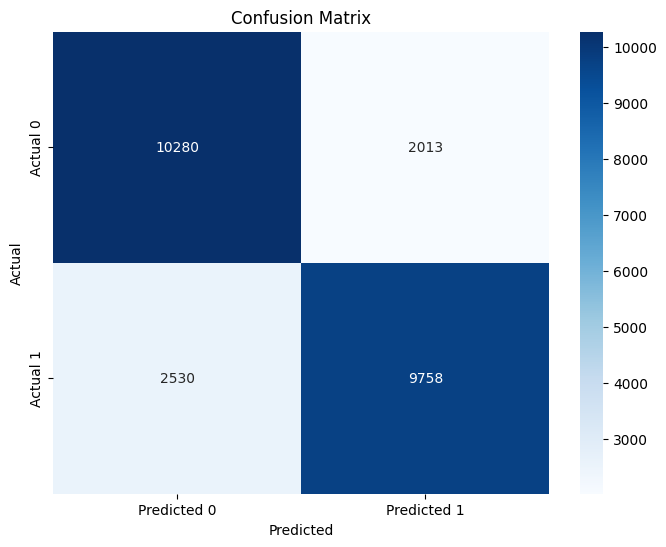

In [153]:
# Calculate ROC-AUC
logit_probs = logit.predict_proba(X_test)[:, 1] # probabilities for the positive class
roc_auc = roc_auc_score(y_test, logit_probs)
print(f"ROC-AUC score: {roc_auc}")

# Calculate and plot the confusion matrix
logit_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, logit_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest**

In [116]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian',
                 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5',
                 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                 'admission_source_id_4', 'admission_source_id_7',
                 'admission_source_id_9', 'A1Cresult_0', 'A1Cresult_1',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [118]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 61451, 1: 6129})
New dataset shape Counter({0: 61451, 1: 61451})


In [154]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [120]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2325,2106,4431
1,249,196,445
All,2574,2302,4876


In [121]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.89
Precision is 0.91
Recall is 0.87


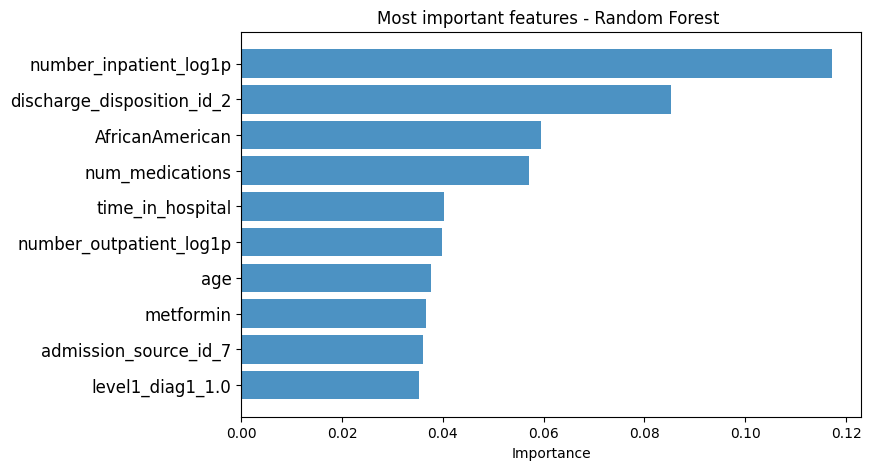

In [124]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(8,5))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()


Random Forest ROC-AUC score: 0.9504869949753333


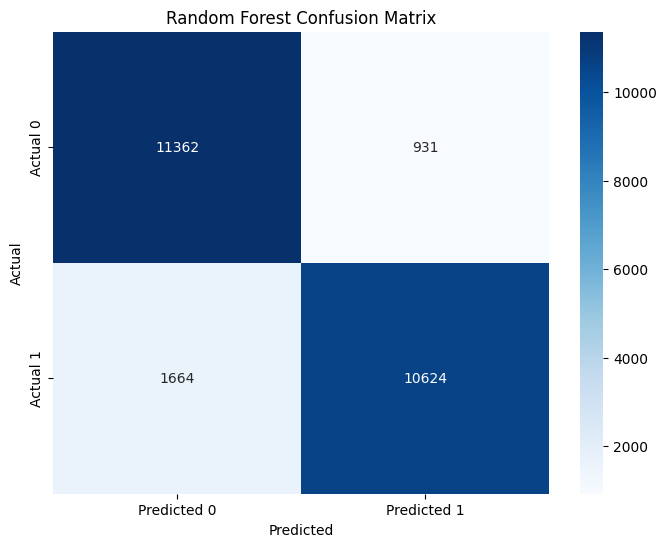

In [155]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate ROC-AUC
rm_probs = rm.predict_proba(X_test)[:, 1]  # probabilities for the positive class
roc_auc = roc_auc_score(y_test, rm_probs)
print(f"Random Forest ROC-AUC score: {roc_auc}")

# Calculate and plot the confusion matrix
rm_pred = rm.predict(X_test)
cm = confusion_matrix(y_test, rm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **XGBoost**

In [125]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

In [126]:
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 61451, 1: 6129})


In [127]:
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))

New dataset shape Counter({0: 61451, 1: 61451})


In [135]:
# Ensure 'age' and potentially other relevant columns are of numeric type
for col in ['age'] + feature_set_no_int:
    if df_pd[col].dtype == 'object':
        try:
            df_pd[col] = pd.to_numeric(df_pd[col], errors='raise')  # Convert to numeric
        except ValueError:
            df_pd[col] = df_pd[col].astype('category').cat.codes  # Ordinal encoding

# Now, proceed with your XGBoost model training
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns=list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(
    train_input_new, train_output_new, test_size=0.20, random_state=0
)

# Enable categorical features in XGBoost
xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=10,
    max_depth=25,
    learning_rate=0.1,
    enable_categorical=True,  # Set enable_categorical to True
    tree_method="hist",        # Recommended for categorical features
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

Original dataset shape Counter({0: 61451, 1: 6129})
New dataset shape Counter({0: 61451, 1: 61451})


In [136]:
pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(xgb_pred, name='Predict'), margins=True)

Predict,0,1,All
Actual,,,
0,2309,2122,4431
1,244,201,445
All,2553,2323,4876


In [137]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, xgb_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, xgb_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, xgb_pred)))

Accuracy is 0.90
Precision is 0.91
Recall is 0.88


In [138]:
accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)

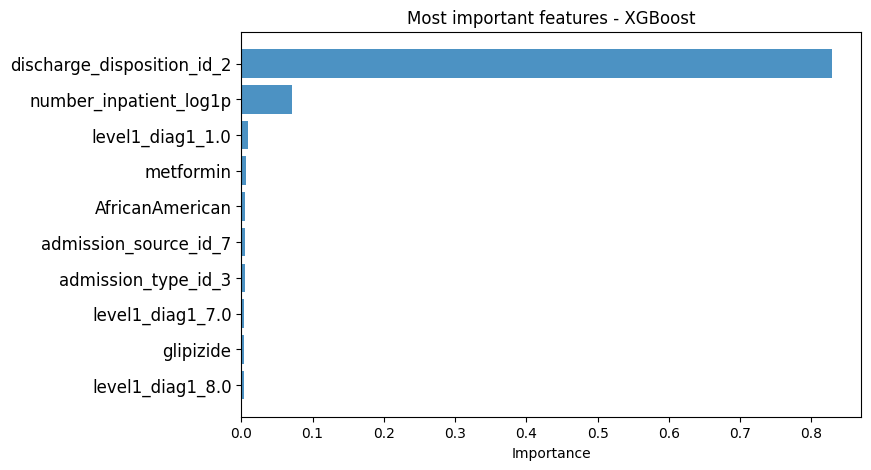

In [139]:
# Feature Importance for XGBoost
feature_names = X_train.columns
feature_imports = xgb_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names, feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(8,5))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
plt.xlabel('Importance')
plt.title('Most important features - XGBoost')
plt.show()

XGBoost ROC-AUC score: 0.9504186032945154


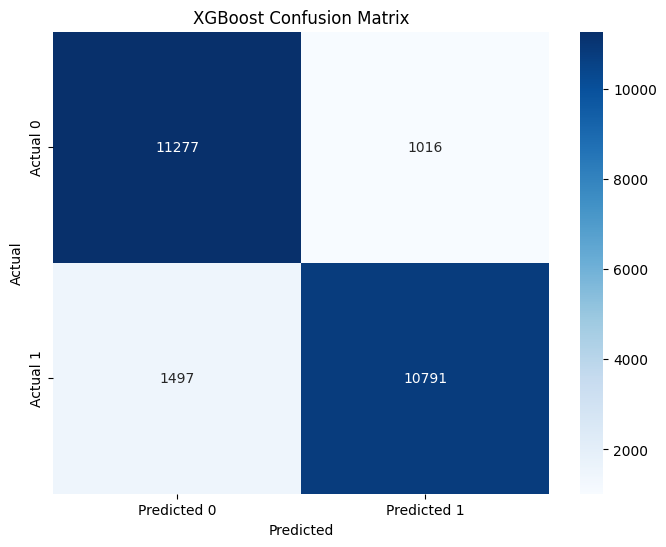

In [156]:
# Calculate ROC-AUC for XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, xgb_probs)
print(f"XGBoost ROC-AUC score: {roc_auc_xgb}")

# Calculate and plot the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model Comparision**

In [140]:
# Create a DataFrame for model comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_logit, accuracy_rm, accuracy_xgb],
    'Precision': [precision_logit, precision_rm, precision_xgb],
    'Recall': [recall_logit, recall_rm, recall_xgb]
})

# Display the model comparison table
print(models)

# Determine the best model based on a chosen metric (e.g., accuracy)
best_model_index = models['Accuracy'].idxmax()
best_model = models.loc[best_model_index, 'Model']
print(f"\nThe best model based on accuracy is: {best_model}")

# You can change the metric ('Accuracy', 'Precision', 'Recall') to find the best model based on other criteria.
# Example: for precision
best_model_index = models['Precision'].idxmax()
best_model = models.loc[best_model_index, 'Model']
print(f"\nThe best model based on precision is: {best_model}")

# Example: for recall
best_model_index = models['Recall'].idxmax()
best_model = models.loc[best_model_index, 'Model']
print(f"\nThe best model based on recall is: {best_model}")

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.885332   0.913043  0.852532
1        Random Forest  0.892600   0.912660  0.868245
2              XGBoost  0.897767   0.913949  0.878174

The best model based on accuracy is: XGBoost

The best model based on precision is: XGBoost

The best model based on recall is: XGBoost


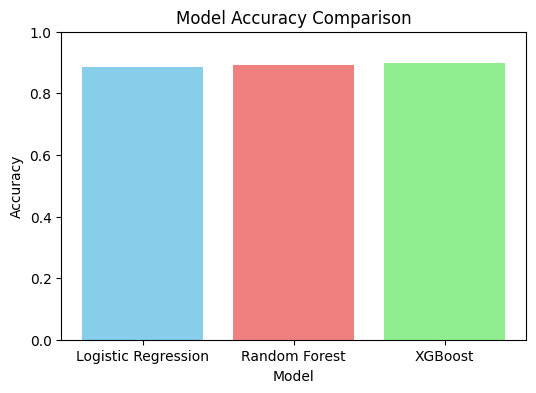

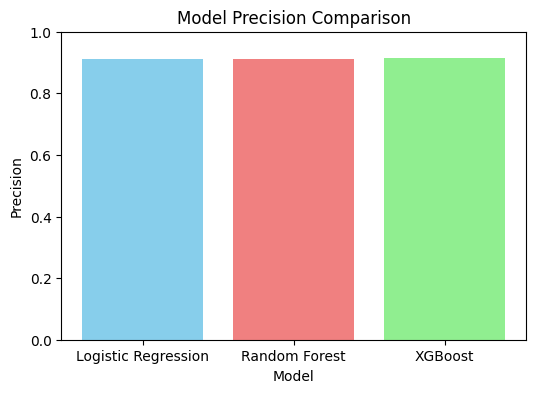

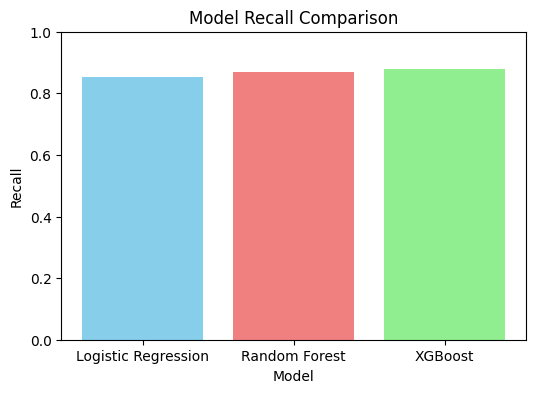

In [144]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_logit, accuracy_rm, accuracy_xgb],
    'Precision': [precision_logit, precision_rm, precision_xgb],
    'Recall': [recall_logit, recall_rm, recall_xgb]
})

# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.bar(models['Model'], models['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()

# Plot Precision
plt.figure(figsize=(6, 4))
plt.bar(models['Model'], models['Precision'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for precision
plt.show()

# Plot Recall
plt.figure(figsize=(6, 4))
plt.bar(models['Model'], models['Recall'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for recall
plt.show()

So XGBoost has yielded best results.